In [4]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from functions import *
from sklearn.model_selection import train_test_split

Loading the Fashion MNIST data from TensorFlow

In [5]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()
train_images, cv_images, train_labels, cv_labels = train_test_split(train_images, train_labels, test_size=0.2, random_state=42)


In [6]:
print('The shape of the train_images is:', train_images.shape)
print('The shape of the train_labels is:', train_labels.shape)
print('The shape of the cv_images is:', cv_images.shape)
print('The shape of the cv_labels is:', cv_labels.shape)
print('The shape of the test_images is:', test_images.shape)
print('The shape of the test_labels is:', test_labels.shape)

The shape of the train_images is: (48000, 28, 28)
The shape of the train_labels is: (48000,)
The shape of the cv_images is: (12000, 28, 28)
The shape of the cv_labels is: (12000,)
The shape of the test_images is: (10000, 28, 28)
The shape of the test_labels is: (10000,)


The images are 28x28 NumPy arrays, with pixel values ranging from 0 to 255. The labels are an array of integers, ranging from 0 to 9.

Each label corresponds to an specific type of clothing. According to the data:

| Label | Piece of clothing |
| --- | --- |
| 0 | T-shirt/top |
| 1 | Trouser |
| 2 | Pullover |
| 3 | Dress |
| 4 | Coat |
| 5 | Sandal |
| 6 | Shirt |
| 7 | Sneaker |
| 8 | Bag |
| 9 | Ankle boot |

This case can be indentified as a non-binary classification case.

In [7]:
name_labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [8]:
print('The first labels in the training set is:', train_labels[0], ' which is a', name_labels[train_labels[0]])

The first labels in the training set is: 7  which is a Sneaker


Let's plot the first training image in order to see the correspondending training label

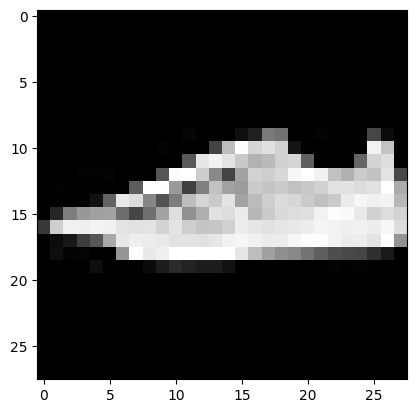

In [9]:
plt.imshow(train_images[0], cmap='gray')

As we can see, it corresponds to an ankle boot. We can visualize more data:

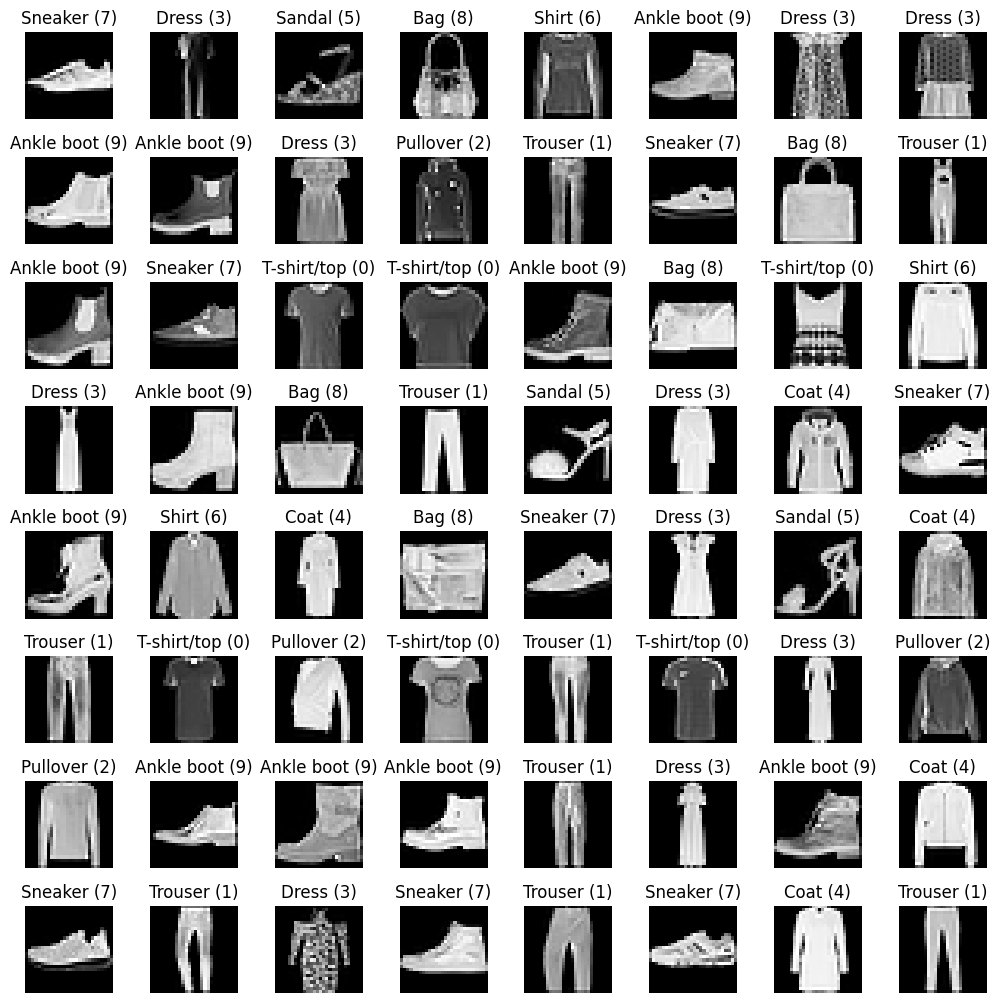

In [10]:
fig, axes = plt.subplots(8, 8, figsize=(10, 10))
fig.tight_layout(pad=0.1)

for i, axes in enumerate(axes.flat):
    axes.imshow(train_images[i], cmap='gray')
    axes.axis('off')
    axes.set_title(name_labels[train_labels[i]] + ' (' + str(train_labels[i]) + ')')


Once we are familiarised with our data, it is time to create a neural network and train it.

In [11]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(10, activation='linear')
],
    name='fashion_mnist_model'
)

c:\Users\mate1\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [12]:
model.summary()

Model: "fashion_mnist_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 104,938 (409.91 KB)

 Trainable params: 104,938 (409.91 KB)

 Non-trainable params: 0 (0.00 B)

Now, we define a loss function, SparseCategoricalCrossentropy and indicates the softmax should be included with the loss calculation by adding from_logits=True. Also we define an optimizer Adam (Adaptive moment).

In [13]:
model.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
)

In [14]:
history = model.fit(
    train_images,
    train_labels,
    epochs=40
)

Epoch 1/40
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 4.1130
Epoch 2/40
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 938us/step - loss: 1.0051
Epoch 3/40
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 938us/step - loss: 0.8385
Epoch 4/40
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 915us/step - loss: 0.7442
Epoch 5/40
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 904us/step - loss: 0.6496
Epoch 6/40
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 925us/step - loss: 0.6042
Epoch 7/40
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 903us/step - loss: 0.5668
Epoch 8/40
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 901us/step - loss: 0.5432
Epoch 9/40
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 927us/step - loss: 0.4964
Epoch 10/40
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 971us/step - loss: 0.4830
Epoch 11/40
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 980us/step - loss: 0.4603
Epoch 12/40
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 925us/step - loss: 0.4450
Epoch 13/40
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 897us/step - loss: 0.4329
Epoch 14/40
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 924us/step - loss: 0.4402
Epo

We can see how the loss decreases as the epoch increases.

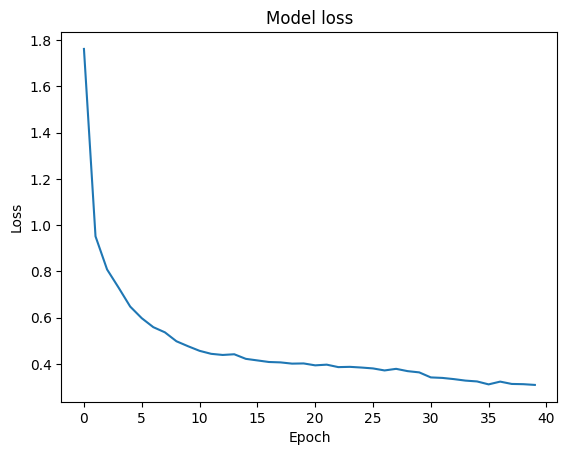

In [15]:
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

The highest value of the output layer corresponds to the label of the piece of clothing. For example, let's predict the label of an image of our test data:

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
The prediction labels are: [[-435.9256   -788.5672   -841.367    -236.99356  -637.9003    -13.155027
  -937.2102   -233.40672  -235.04436  -282.88187 ]]
The highest value is: -13.155027 which is at index: 5 which is a Sandal


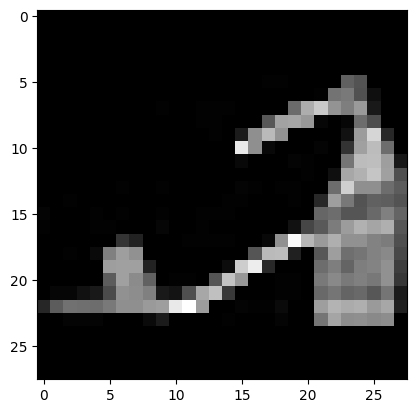

In [16]:
example_image = cv_images[33]
plt.imshow(example_image, cmap='gray')

prediction = model.predict(example_image.reshape(1, 28, 28))

print('The prediction labels are:', prediction)
print('The highest value is:', max(prediction[0]), 'which is at index:', np.argmax(prediction), 'which is a', name_labels[np.argmax(prediction)])

If the problem requires a probability, it is essential to use the softmax (normalized exponential function)

In [17]:
prediction_prob = tf.nn.softmax(prediction)
print('The prediction probability of each label is:', prediction_prob)
print('The image corresponds to a', name_labels[np.argmax(prediction)], 'with a probability of:', 100 * np.max(prediction_prob), '%')

The prediction probability of each label is: tf.Tensor([[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]], shape=(1, 10), dtype=float32)
The image corresponds to a Sandal with a probability of: 100.0 %


Text(0, 0.5, 'Probability')

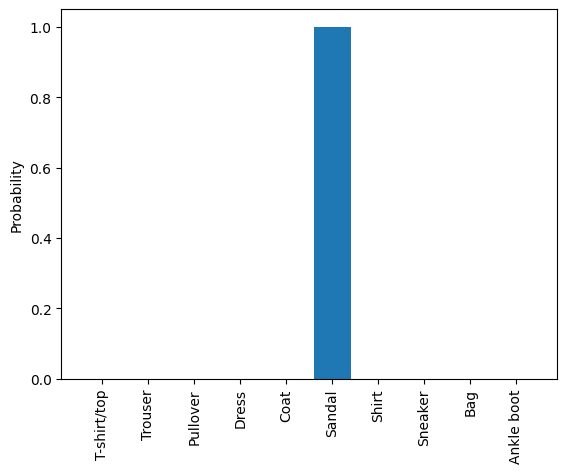

In [18]:
plt.bar(range(10),prediction_prob[0])
plt.xticks(range(10), name_labels , rotation=90)
plt.ylabel('Probability')

Now we will take a look at the overall validation of our test data and how many mistakes our model makes.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━

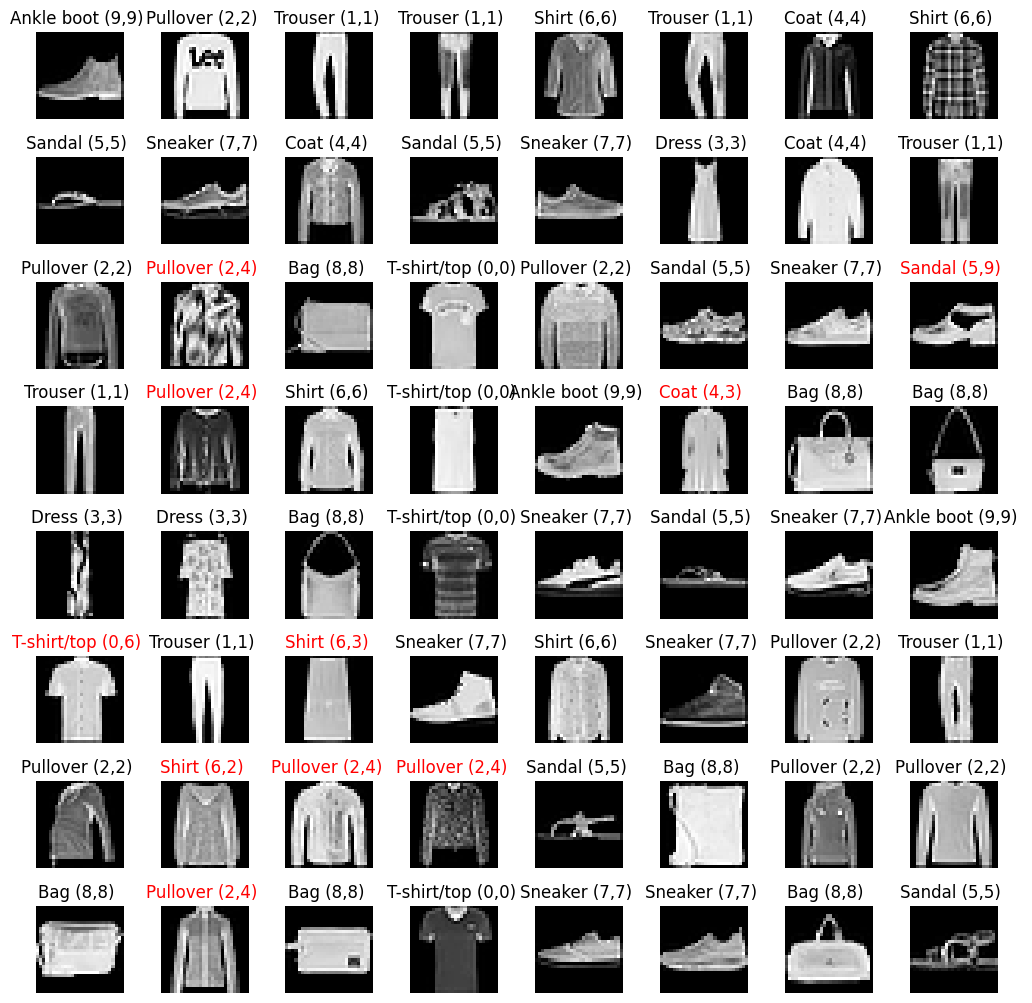

In [19]:
fig, axes = plt.subplots(8, 8, figsize=(10, 10))
fig.tight_layout(pad=0.1)

for i, axes in enumerate(axes.flat):
    axes.imshow(test_images[i], cmap='gray')
    axes.axis('off')
    prediction = model.predict(test_images[i].reshape(1, 28, 28))
    prediction_prob = tf.nn.softmax(prediction)
    if np.argmax(prediction) == test_labels[i]:
        axes.set_title(name_labels[np.argmax(prediction)] + ' (' + str(np.argmax(prediction)) +',' +str(test_labels[i])  + ') ', color='black')
    else:
        axes.set_title(name_labels[np.argmax(prediction)] + ' (' + str(np.argmax(prediction)) +',' +str(test_labels[i])  + ') ', color='red') 

Lets see the total accuracy of our model:

In [20]:
prediction_test = model.predict(test_images)
prediction_train = model.predict(train_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 576us/step
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 567us/step


In [21]:
pred_test_labels = np.argmax(prediction_test, axis=1)
pred_train_labels = np.argmax(prediction_train, axis=1)
accuracy_train = np.sum(pred_train_labels == train_labels) / len(train_labels)
accuracy_test = np.sum(pred_test_labels == test_labels) / len(test_labels)

print('The accuracy of the training set is:', accuracy_train)
print('The accuracy of the test set is:', accuracy_test)

The accuracy of the training set is: 0.9031458333333333
The accuracy of the test set is: 0.8576


We can discuss which model is the best looking at the classificatione error function:

$$ J = \frac{1}{m} \sum_{i=0}^{m-1} \left\{ \begin{array}{cc} 1, & y_{\rm real} = y_{\rm pred} \\ \\ 0, & \rm otherwise \end{array} \right. $$

In [22]:
train_err = eval_cat_err(train_labels, pred_train_labels)
test_err = eval_cat_err(test_labels, pred_test_labels)
print('The training error function is:', train_err)
print('The test error function is:', test_err)

The training error function is: 0.09685416666666667
The test error function is: 0.1424


We can see how the accuracy of the training set is higher than the test set (or the error function is higher in the test data than in the training data), therefore we can have an overfitting problem. Let's see how can we solve this problem using the function program and the cros-validation data:

In [23]:
nn_models = build_models()
cost_train_list = []
cost_cv_list = []

for model in nn_models:
    
    model.compile(
        loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
        metrics=['accuracy']
    )
    
    print(f'Training model: {model.name} ...')
    
    history = model.fit(
    train_images,
    train_labels,
    epochs=40,
    )
    
    print('Done!')
    
    prediction_cv = model.predict(cv_images)
    prediction_train = model.predict(train_images)
    pred_cv_labels = np.argmax(prediction_cv, axis=1)
    pred_train_labels = np.argmax(prediction_train, axis=1)
    
    train_err = eval_cat_err(train_labels, pred_train_labels)
    cv_err = eval_cat_err(cv_labels, pred_cv_labels)

    cost_train_list.append(train_err)
    cost_cv_list.append(cv_err)
    
print('Results:')
for i, model in enumerate(nn_models):
    print(f'{model.name}: Train error: {cost_train_list[i]}, Cv error: {cost_cv_list[i]}')

Training model: model_1 ...
Epoch 1/40


c:\Users\mate1\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 899us/step - accuracy: 0.6753 - loss: 12.5299
Epoch 2/40
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 877us/step - accuracy: 0.7117 - loss: 0.8047
Epoch 3/40
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 872us/step - accuracy: 0.7643 - loss: 0.6440
Epoch 4/40
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 891us/step - accuracy: 0.8042 - loss: 0.5527
Epoch 5/40
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 885us/step - accuracy: 0.8146 - loss: 0.5295
Epoch 6/40
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 895us/step - accuracy: 0.8205 - loss: 0.5154
Epoch 7/40
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 870us/step - accuracy: 0.8240 - loss: 0.5136
Epoch 8/40
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 892us/step - accuracy: 0.8319 - loss: 0.4909
Epoch 9/40
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 899us/step - accuracy: 0.8369 - loss: 0.4751
Epoch 10/40
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 867us/step - accuracy: 0.8378 - loss: 0.4705
Epoch 11/40
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 893us/step - accuracy: 0.8378 - loss: 0.4707
Epoch 12/40
1500/1

According to the results the model 3 (we could choose 4 to) is the one with a lower cost function value. We will iterate to find the optimal regularization value.

In [24]:
tf.random.set_seed(1234)
lambdas = [0.0, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3]
models= [None] * len(lambdas)

cost_train_list = []
cost_cv_list = []

for i in range(len(lambdas)):
    lambda_ = lambdas[i]
    models[i] = tf.keras.models.Sequential([
        tf.keras.layers.Flatten(input_shape=(28, 28)),
        tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(lambda_)),
        tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(lambda_)),
        tf.keras.layers.Dense(32, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(lambda_)),
        tf.keras.layers.Dense(10, activation='linear')
        ],
        name='model_3'
        )
    models[i].compile(
        loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        optimizer=tf.keras.optimizers.Adam(0.001),
        metrics=['accuracy']
    )

    history = models[i].fit(
        train_images,train_labels,
        epochs=40,
    )
    
    prediction_cv = models[i].predict(cv_images)
    prediction_train = models[i].predict(train_images)
    pred_cv_labels = np.argmax(prediction_cv, axis=1)
    pred_train_labels = np.argmax(prediction_train, axis=1)
    
    train_err = eval_cat_err(train_labels, pred_train_labels)
    cv_err = eval_cat_err(cv_labels, pred_cv_labels)

    cost_train_list.append(train_err)
    cost_cv_list.append(cv_err)
    
    print(f"Finished lambda = {lambda_}")
    
print('Results:')
for i in range(len(lambdas)):
    print(f'{lambdas[i]}: Train error: {cost_train_list[i]}, Cv error: {cost_cv_list[i]}')

Epoch 1/40
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.3338 - loss: 3.8397
Epoch 2/40
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.4780 - loss: 1.3024
Epoch 3/40
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.5854 - loss: 1.0183
Epoch 4/40
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6336 - loss: 0.8636
Epoch 5/40
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7185 - loss: 0.7086
Epoch 6/40
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7515 - loss: 0.6041
Epoch 7/40
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7718 - loss: 0.5709
Epoch 8/40
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8315 - loss: 0.4989
Epoch 9/40
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8478 - loss: 0.4501
Epoch 10/40
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8568 - loss: 0.4162
Epoch 11/40
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8615 - loss: 0.4040
Epoch 12/40
1500/1500 ━━━━━━━━

In [25]:
print('Results:')
for i in range(len(lambdas)):
    print(f'{lambdas[i]}: Train cost: {cost_train_list[i]}, Test cost: {cost_cv_list[i]}')

Results:
0.0: Train cost: 0.09929166666666667, Test cost: 0.13366666666666666
0.001: Train cost: 0.11666666666666667, Test cost: 0.13408333333333333
0.01: Train cost: 0.157125, Test cost: 0.16433333333333333
0.05: Train cost: 0.20202083333333334, Test cost: 0.20691666666666667
0.1: Train cost: 0.19229166666666667, Test cost: 0.19483333333333333
0.2: Train cost: 0.19752083333333334, Test cost: 0.20358333333333334
0.3: Train cost: 0.218375, Test cost: 0.22125


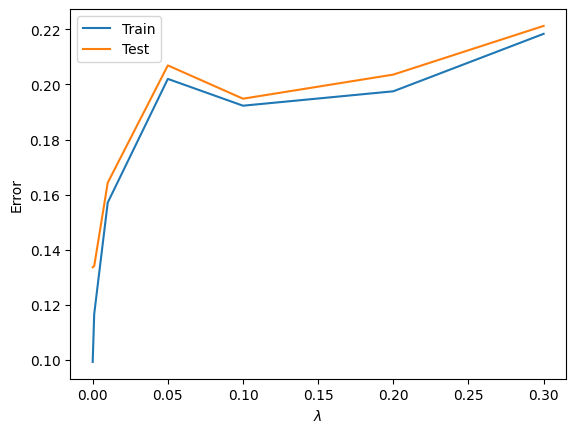

In [26]:
plt.plot(lambdas, cost_train_list, label='Train')
plt.plot(lambdas, cost_cv_list, label='Test')
plt.xlabel(r'$\lambda$')
plt.ylabel('Error')
plt.legend()
plt.show()

The best one is $\lambda = 0.001$.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━

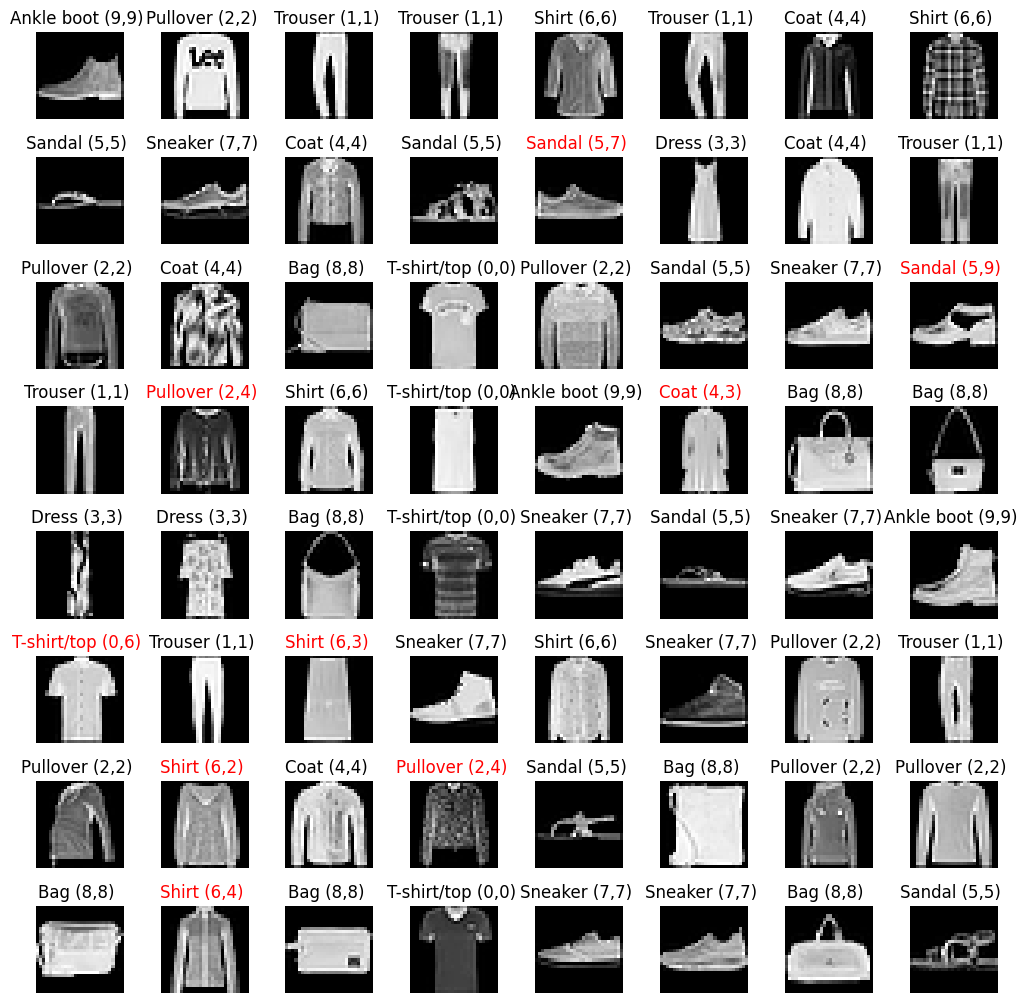

In [27]:
model = models[lambdas==0.001]
fig, axes = plt.subplots(8, 8, figsize=(10, 10))
fig.tight_layout(pad=0.1)

for i, axes in enumerate(axes.flat):
    axes.imshow(test_images[i], cmap='gray')
    axes.axis('off')
    prediction = model.predict(test_images[i].reshape(1, 28, 28))
    prediction_prob = tf.nn.softmax(prediction)
    if np.argmax(prediction) == test_labels[i]:
        axes.set_title(name_labels[np.argmax(prediction)] + ' (' + str(np.argmax(prediction)) +',' +str(test_labels[i])  + ') ', color='black')
    else:
        axes.set_title(name_labels[np.argmax(prediction)] + ' (' + str(np.argmax(prediction)) +',' +str(test_labels[i])  + ') ', color='red') 

In [28]:
prediction_test = model.predict(test_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 589us/step


In [29]:
pred_test_labels = np.argmax(prediction_test, axis=1)
test_err = eval_cat_err(test_labels, pred_test_labels)
print('The test error function is:', test_err)


The test error function is: 0.1406


Which is lower than before.